### Import libraries

In [53]:
# Import library
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler, RobustScaler
from sklearn.compose import make_column_transformer

### Import files

In [54]:
anime_data = pd.read_csv('../anime_cleaned.csv')

### Removing some blank data

In [55]:
anime_data['episodes'].replace('', np.nan, inplace=True)
anime_data.dropna(subset=['episodes'], inplace=True)
anime_data['episodes'] = anime_data['episodes'].astype('int64')

### Init

In [56]:
linreg = LinearRegression()
gbm = GradientBoostingRegressor()

In [57]:
boardcast_cat = ['Sundays',
                 'Mondays',
                 'Tuesdays',
                 'Wednesdays',
                 'Thursdays',
                 'Fridays',
                 'Saturdays',
                 'Not schedule',
                 'Unknown']

### Helper function

In [58]:
def linear_regression(predictors, numeric_predictors, cat_predictors_nominal, cat_predictors_ordinal, response):
    # Extract Response and Predictors
    y = pd.DataFrame(anime_data[response])
    X = pd.DataFrame(anime_data[predictors])

    oe = OrdinalEncoder(categories=[boardcast_cat])
    ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
    
    oe.fit_transform(X[cat_predictors_ordinal])
    ohe.fit_transform(X[cat_predictors_nominal])

    column_transformer = make_column_transformer(
        (RobustScaler(), numeric_predictors),
        (oe, cat_predictors_ordinal),
        (ohe, cat_predictors_nominal))
        
    column_transformer.fit_transform(X)
    
    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    
    # Linear Regression using Train Data
    lm_pipeline = make_pipeline(column_transformer, linreg)
    gbm_pipeline = make_pipeline(column_transformer, gbm)
    gbm_pipeline.fit(X_train, y_train)
    lm_pipeline.fit(X_train, y_train)        
    
    # Coefficients of the Linear Regression line
    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regression \t: a = ', linreg.coef_)
    print()
    
    # Print the Coefficients against Predictors
    print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
    print()
    
    # Predict Response corresponding to Predictors
    y_train_pred = lm_pipeline.predict(X_train)
    y_test_pred =  lm_pipeline.predict(X_test)

    y_gbm_train_pred = gbm_pipeline.predict(X_train)
    y_gbm_test_pred = gbm_pipeline.predict(X_test)
    
    # Plot the Predictions vs the True values
    f, axes = plt.subplots(2, 2, figsize=(24, 12))
    axes[0][0].scatter(y_train, y_train_pred, color = "blue")
    axes[0][0].plot(y_train, y_train, 'w-', linewidth = 1)
    axes[0][0].set_xlabel("True values of the Response Variable (Train)")
    axes[0][0].set_ylabel("Predicted values of the Response Variable (Train)")
    axes[1][0].scatter(y_test, y_test_pred, color = "green")
    axes[1][0].plot(y_test, y_test, 'w-', linewidth = 1)
    axes[1][0].set_xlabel("True values of the Response Variable (Test)")
    axes[1][0].set_ylabel("Predicted values of the Response Variable (Test)")

    axes[0][1].scatter(y_train, y_gbm_train_pred, color = "blue")
    axes[0][1].plot(y_train, y_train, 'w-', linewidth = 1)
    axes[0][1].set_xlabel("GB True values of the Response Variable (Train)")
    axes[0][1].set_ylabel("GB Predicted values of the Response Variable (Train)")
    axes[1][1].scatter(y_test, y_gbm_test_pred, color = "green")
    axes[1][1].plot(y_test, y_test, 'w-', linewidth = 1)
    axes[1][1].set_xlabel("GB True values of the Response Variable (Test)")
    axes[1][1].set_ylabel("GB Predicted values of the Response Variable (Test)")
    plt.show()
    
    print("Linear Regression")
    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", lm_pipeline.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()
    
    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", lm_pipeline.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()

    print("Gradient Boosting")
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", gbm_pipeline.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_gbm_train_pred))
    print()
    
    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", gbm_pipeline.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_gbm_test_pred))
    print()

    return (lm_pipeline, gbm_pipeline)

### Predicting `score` with `episodes` and `duration`

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Intercept of Regression 	: b =  [7.30404589]
Coefficients of Regression 	: a =  [[-4.83322096e-01  1.31114792e-02  4.84193377e-02 -5.09984900e-04
  -2.10878156e-02  7.71057383e-02 -2.08412185e-01  1.56736132e-01
  -1.81203324e-01 -1.49978224e-01  6.87382693e-02 -2.87708477e-01
  -2.49870317e-01  2.78875267e-01  2.56192707e-02 -4.24992054e-02
   2.40370109e-01 -3.58243811e-01 -2.25680565e-02 -2.86744103e-01
  -4.19745960e-03  9.65068192e-01 -9.19505029e-02  1.18387111e-01
  -1.06077967e-01  2.46437592e-02  6.35787371e-02 -8.58113719e-03
  -1.31643697e-02  4.28806299e-02  5.01349319e-02  1.71104061e-01
   2.90226517e-02  6.21236549e-02 -5.18243858e-03  6.04233078e-02
   7.75799422e-02 -1.81198871e-02 -6.64931034e-02 -3.62557845e-02
  -7.29523626e-02 -1.03734189e-01  1.39724866e-01 -3.36630328e-01
   1.95384176e-02  1.79769098e-03 -9.50653391e-05 -7.46560465e-02
   1.30711620e-01 -5.77581993e-02  1.05940706e-01 -3.04515916e-02
   7.94244786e-02  3.66042490e-02  7.33888953e-02 -2.64906737e

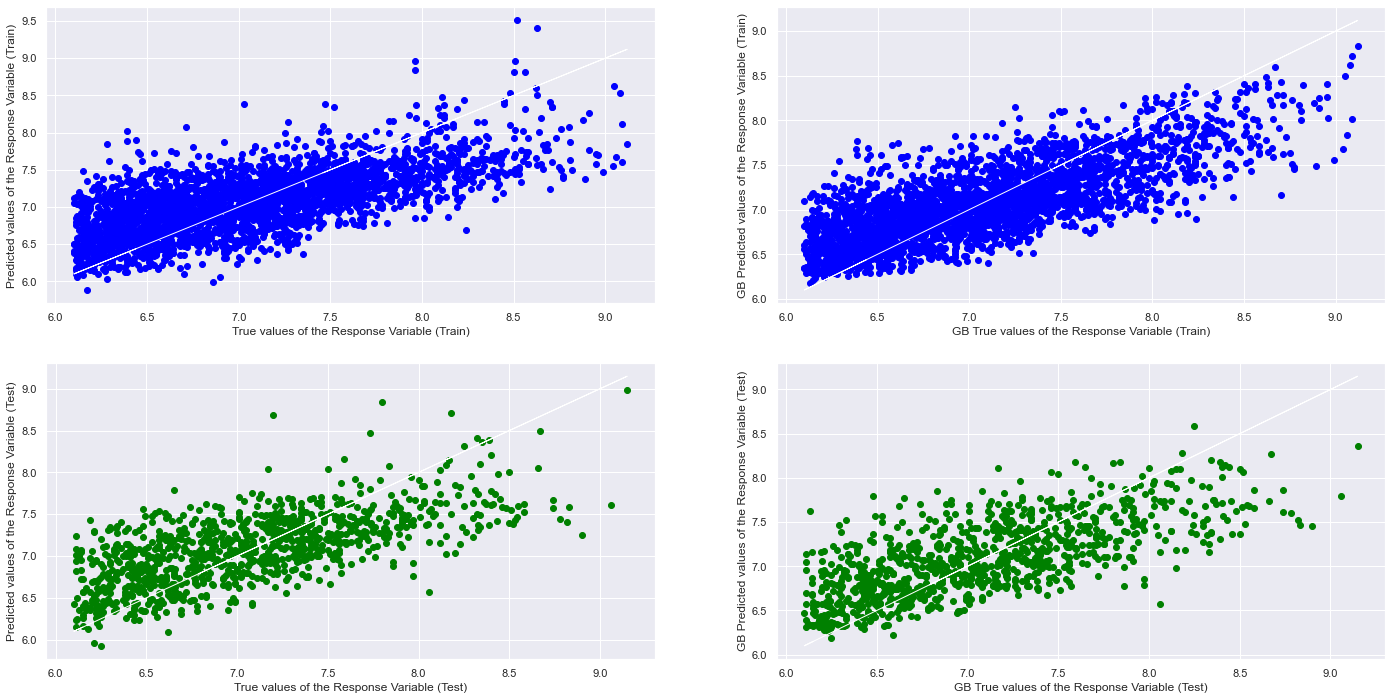

Linear Regression
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4649436617756513
Mean Squared Error (MSE) 	: 0.20548062745181314

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4453176624622086
Mean Squared Error (MSE) 	: 0.2104463994418637

Gradient Boosting
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5737242614700704
Mean Squared Error (MSE) 	: 0.16370501564619908

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4855468404739761
Mean Squared Error (MSE) 	: 0.19518345506425322



In [59]:
(lm_pipeline, gbm_pipeline) = linear_regression(['popularity', 'duration', 'scored_by_users', 'broadcast', 'source', 'demographic', 'main genre', 'premiered', 'rating', 'status', 'type'],
                                ['popularity', 'duration', 'scored_by_users'], 
                                ['source', 'demographic', 'main genre', 'premiered', 'rating', 'status', 'type'], 
                                ['broadcast'], 'score')

#### Prediction

In [60]:
# Extract Pokemons for Prediction
anime_pred = anime_data[anime_data["title"].isin(["Steins;Gate",
                                                 "Dr. Stone", 
                                                 "One Piece",
                                                 "Mobile Suit Gundam 00",
                                                 "Naruto: Shippuuden",
                                                 "Jujutsu Kaisen",
                                                "Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season Part 2",
                                                "Magical Nyan Nyan Taruto",
                                                "Shingeki no Kyojin: The Final Season Part 2",
                                                "Death Note",
                                                "Tokyo Ghoul",
                                                "Tokyo Ghoul:re"])]

In [61]:
# Extract Predictors for Prediction
X_pred = pd.DataFrame(anime_pred[['popularity', 'duration', 'scored_by_users', 'broadcast', 'source', 'demographic', 'main genre', 'premiered', 'rating', 'status', 'type']])

# Predict Response corresponding to Predictors
y_pred = lm_pipeline.predict(X_pred)
gb_y_pred = gbm_pipeline.predict(X_pred)

In [62]:
# Summarize the Actuals, Predictions and Errors
y_pred = pd.DataFrame(y_pred, columns = ["PredScore"], index = anime_pred.index)
animedata_acc = pd.concat([anime_pred[["title", "score"]], y_pred], axis = 1)

y_errs = 100 * abs(animedata_acc["score"] - animedata_acc["PredScore"]) / animedata_acc["score"]
y_errs = pd.DataFrame(y_errs, columns = ["Error"], index = anime_pred.index)
animedata_acc= pd.concat([animedata_acc, y_errs], axis = 1)

animedata_acc

,title,score,PredScore,Error
1,Shingeki no Kyojin: The Final Season Part 2,9.12,7.842637,14.006178
2,Steins;Gate,9.09,8.113545,10.742081
43,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Seas...,8.51,7.555497,11.216249
100,Jujutsu Kaisen,7.71,7.269150,5.717898
650,Dr. Stone,8.30,8.137215,1.961261
938,Naruto: Shippuuden,8.23,8.440275,2.554985
1759,Mobile Suit Gundam 00,8.12,7.407386,8.776038
2276,Death Note,8.63,9.410173,9.040243
2277,One Piece,8.62,8.601358,0.216261
3241,Tokyo Ghoul:re,6.39,8.022275,25.544215


In [63]:
# Summarize the Actuals, Predictions and Errors
gb_y_pred = pd.DataFrame(gb_y_pred, columns = ["PredScore"], index = anime_pred.index)
animedata_acc_gb = pd.concat([anime_pred[["title", "score"]], gb_y_pred], axis = 1)

gb_y_errs = 100 * abs(animedata_acc_gb["score"] - animedata_acc_gb["PredScore"]) / animedata_acc_gb["score"]
gb_y_errs = pd.DataFrame(gb_y_errs, columns = ["Error"], index = anime_pred.index)
animedata_acc_gb= pd.concat([animedata_acc_gb, gb_y_errs], axis = 1)

animedata_acc_gb

,title,score,PredScore,Error
1,Shingeki no Kyojin: The Final Season Part 2,9.12,8.834686,3.128448
2,Steins;Gate,9.09,8.726806,3.995529
43,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Seas...,8.51,7.673886,9.825075
100,Jujutsu Kaisen,7.71,6.996187,9.258271
650,Dr. Stone,8.30,8.064763,2.834185
938,Naruto: Shippuuden,8.23,8.305240,0.914218
1759,Mobile Suit Gundam 00,8.12,7.394662,8.932738
2276,Death Note,8.63,8.423662,2.390938
2277,One Piece,8.62,8.490683,1.500192
3241,Tokyo Ghoul:re,6.39,7.770601,21.605647
